# `FINAL PROJECT - TIMESERIES FORECASTING`

**Name : Argon Riadi**
**Batch : HCK - 004**

Dalam notebook ini saya akan membuat model untuk memprediksi jumlah kuantitas produk yang terjual dari perusahaan ParagonCorp



# `EXTERNAL LINKS`

- [Dashboard Google Trends ParagonCorp - YouTube Search ](https://trends.google.com/trends/explore?geo=ID&q=emina%20makeup,kahf,wardah,make%20over&hl=en)

# `IMPORT LIBRARY`

In [42]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# `DATASET LOADING`

In [2]:
# Loading dataset
df = pd.read_csv("sample_dataset_timeseries_noarea.csv")
df

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


Insight:

- Dataset memiliki 103,733 data entry & 5 kolom

- week_number = Minggu ke berapa untuk produk tertentu yang terjual (2021-52 hingga 2023-14)
- week_start_date = Periode kapan suatu produk mulai terjual
- week_end_date = Periode kapan suatu produk selesai terjual
- product_item = Produk item / produk code (variabel bebas)
- quantity = Jumlah produk yang terjual dalam periode tersebut

# `EDA`

In [3]:
# Cek missing value
df.isnull().sum()

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

Insight:

- Dari data di atas terlihat bahwa ada 2 missing value pada kolom product item dan akan saya lakukan handling missing value untuk handling missing value tersebut

In [4]:
# Handling missing value
df.dropna()

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119
...,...,...,...,...,...
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920


In [5]:
# Lihat kelengkapan data setelah handling missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Insight:

- Dari data di atas terlihat bahwa untuk kolom week start date & week end date masih berbentuk object sehingga harus diubah menjadi bentuk DateTime

In [41]:
# Ubah tipe objek di week start date & week end date menjadi datetime
df['week_start_date']=pd.to_datetime(df['week_start_date'])
df['week_end_date']=pd.to_datetime(df['week_end_date'])

In [7]:
# Lihat kelengkapan data setelah handling tipe objek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


In [8]:
# Lihat produk yang paling sering muncul
df['product_item'].value_counts()

0073377087c7ddace313ff829cd7b0b3    67
870b3ad8c41b746b29ba31f6e4040950    67
9264576b8833b892b34a39525bcdd271    67
921cfbd1930eeee6b82a7b053c4ed8dc    67
91f65f29b32c39788b4294cbe2be7024    67
                                    ..
d97d3a3e53124b6b1a8313403f54f6b8     1
d963020bd8d76659c6768ad252be9629     1
d4e90f2dcbcf53757d6bd1f3b6f368cb     1
170ad92bf82a3509886ceb841cd6e3c3     1
ff9d05a4d6f922b3ab1653f58165b8ce     1
Name: product_item, Length: 2309, dtype: int64

In [9]:
# Lihat produk yang paling banyak dibeli
df.groupby('product_item')[['quantity']].max()

,quantity
product_item,
00450b4fde94b528b4255b4f6f51599d,627
0065e8b533cd2c8273529312a6e8f219,1843
0073377087c7ddace313ff829cd7b0b3,486
0098d23d332c193a07eabaf0f703d4e5,7113
009e12e8fd2ef0b77047206e939fc6b9,1573
...,...
ff92741956851dca5a1daafeef1d9dd7,16
ff9d05a4d6f922b3ab1653f58165b8ce,16
ffbd6f1d884056a4f622d54ae79e5a14,112978


Insight:

- Dari 2 data di atas terlihat bahwa product item '0073377087c7ddace313ff829cd7b0b3' menjadi produk dengan kuantiti penjualan tersering dan masuk dalam top 5 produk dengan penjualan terbanyak

In [10]:
# Lihat kelengkapan data setelah final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102733 non-null  object        
 1   week_start_date  102733 non-null  datetime64[ns]
 2   week_end_date    102733 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102733 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ MB


In [11]:
# Copy dataset ke variabel baru
df2 = df.copy()

In [12]:
# Drop kolom yang tidak terpakai
df2.drop(columns=[
'week_number','week_end_date','product_item'
], inplace=True)

df2

,week_start_date,quantity
0,2021-12-27,41
1,2021-12-27,430
2,2021-12-27,4
3,2021-12-27,148
4,2021-12-27,119
...,...,...
102728,2023-04-03,907
102729,2023-04-03,81
102730,2023-04-03,16
102731,2023-04-03,42920


Insight:

- Untuk kebutuhan prosesing model timeseries lebih lanjut maka hanya dipilih kolom week start date & quantity saja

In [13]:
# Manipulasi dataset
df2 = df[['week_start_date','quantity']]
df2.set_index('week_start_date', inplace=True)
df2.groupby('week_start_date')['quantity'].sum()
df2 = pd.DataFrame(df2.groupby('week_start_date')['quantity'].sum()).sort_index() 
df2

,quantity
week_start_date,
2021-12-27,128808
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


Insight:

- Untuk kebutuhan prosesing model timeseries lebih lanjut maka kita menjadikan kolom week start date menjadi index dalam dataset baru ini

- Pada kolom week start date sudah di-compile quantity dengan penjualan di tanggal yang sama menjadi 1 total quantity saja

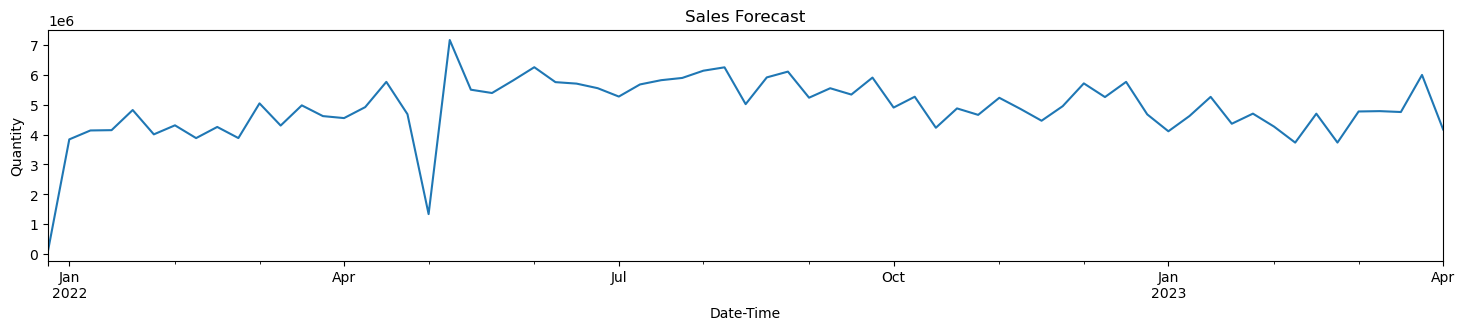

In [14]:
# Plot dataset
fig, ax = plt.subplots()
df2['quantity'].plot(figsize=(18,3),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Quantity')
ax.set_title('Sales Forecast')
plt.show()

Insight:

- Dari data di atas terlihat bahwa selama periode jan 2022 hingga apr 2023 terjadi kenaikan & penurunan tertinggi di bulan apr 2022 - juli 2022, hal ini disebabkan oleh adanya:

*Kenaikan transaksi penjualan pada periode Ramadhan 2022
*Kenaikan interest beauty enthusiast di awal tahun pada 'Wardah Everyday Matte Lip Shot', terlihat dari banyaknya jumlah review di youtube, Ad views yang lebih dari 4 juta di youtube wardah & transaksi di ecommerce shopee yang mencapai lebih dari 10,000 produk terjual*

*source google trends


In [15]:
# Menghilangkan data di tahun 2021
df3 = df2.copy()
df3 = df2['2022':]
df3

,quantity
week_start_date,
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
2022-01-31,4008027
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


Insight:

- Dari data di atas terlihat bahwa saya hanya menggunakan data dari periode 2022-2023 saja untuk kebutuhan forecast modeling

# `MODEL ANALYSIS`

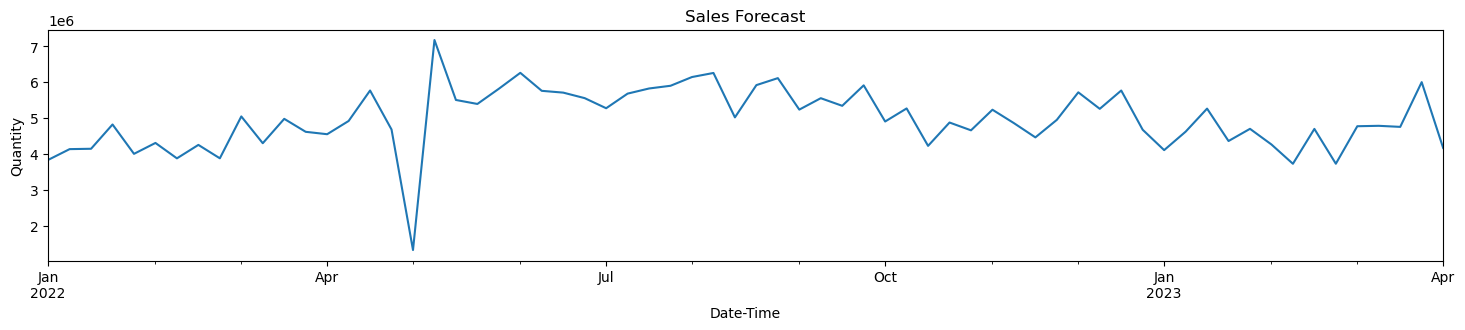

In [16]:
# Melihat plot data quantity dari Jan 2022 - Apr 2023
fig, ax = plt.subplots()
df3['quantity'].plot(figsize=(18,3),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Quantity')
ax.set_title('Sales Forecast')
plt.show()

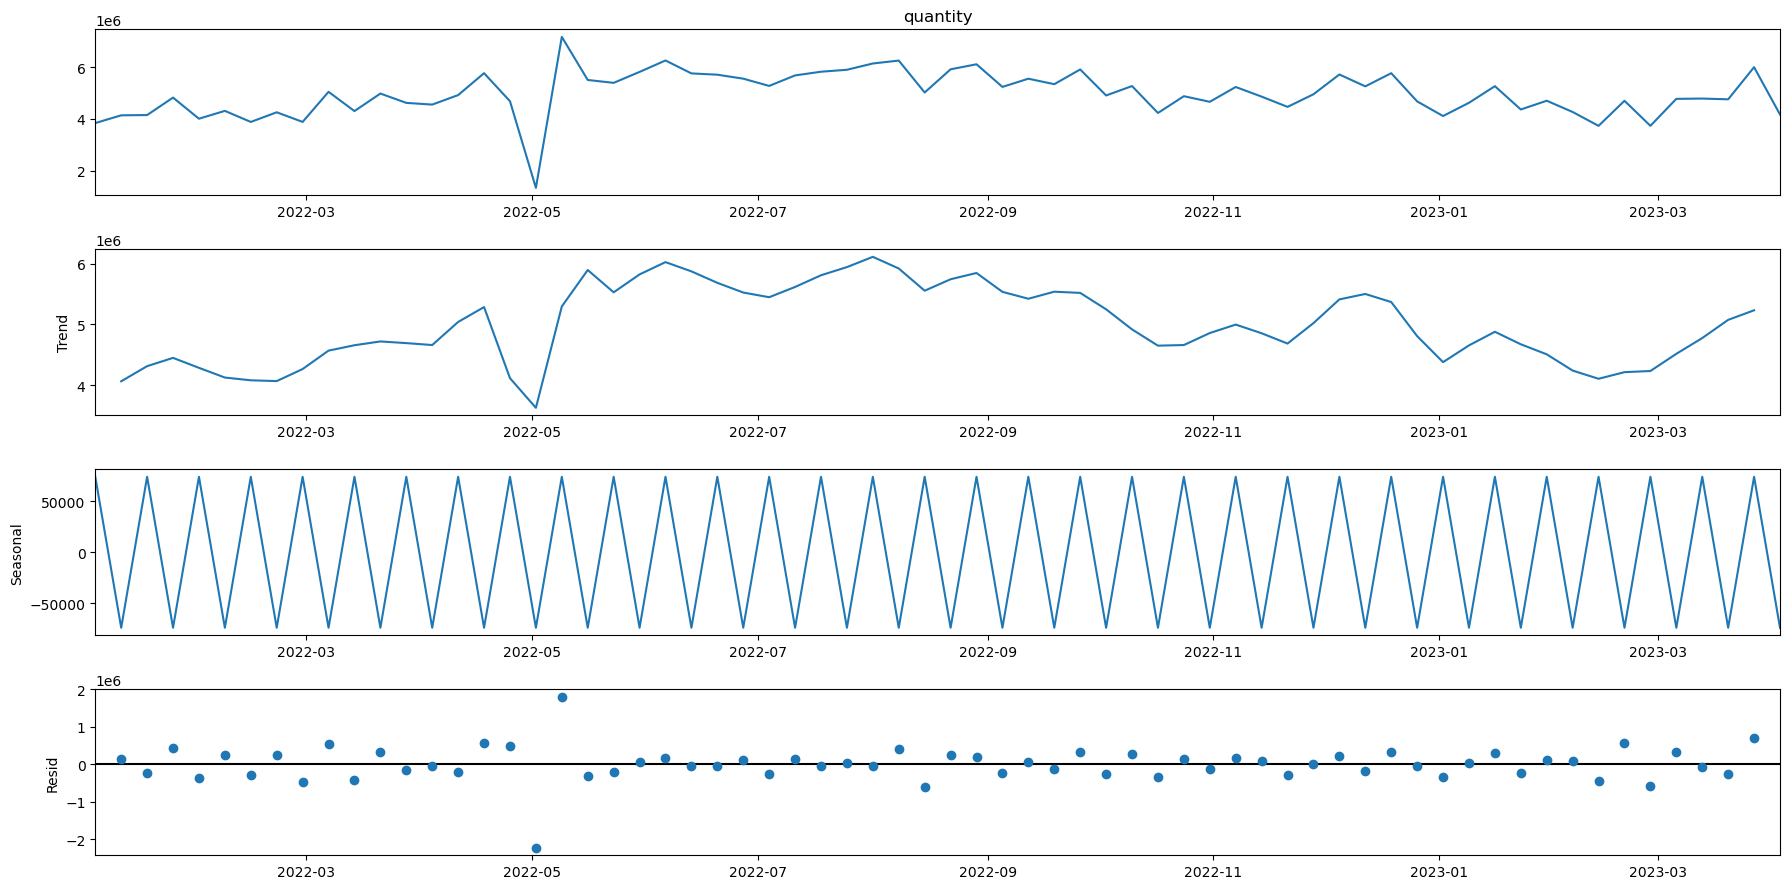

In [17]:
# Cek dataset menggunakan seasonal decomposed additive
decomposed = seasonal_decompose(df3['quantity'], model='additive',period=2)
fig = decomposed.plot()
fig.set_size_inches((18, 9))

fig.tight_layout()
plt.show();

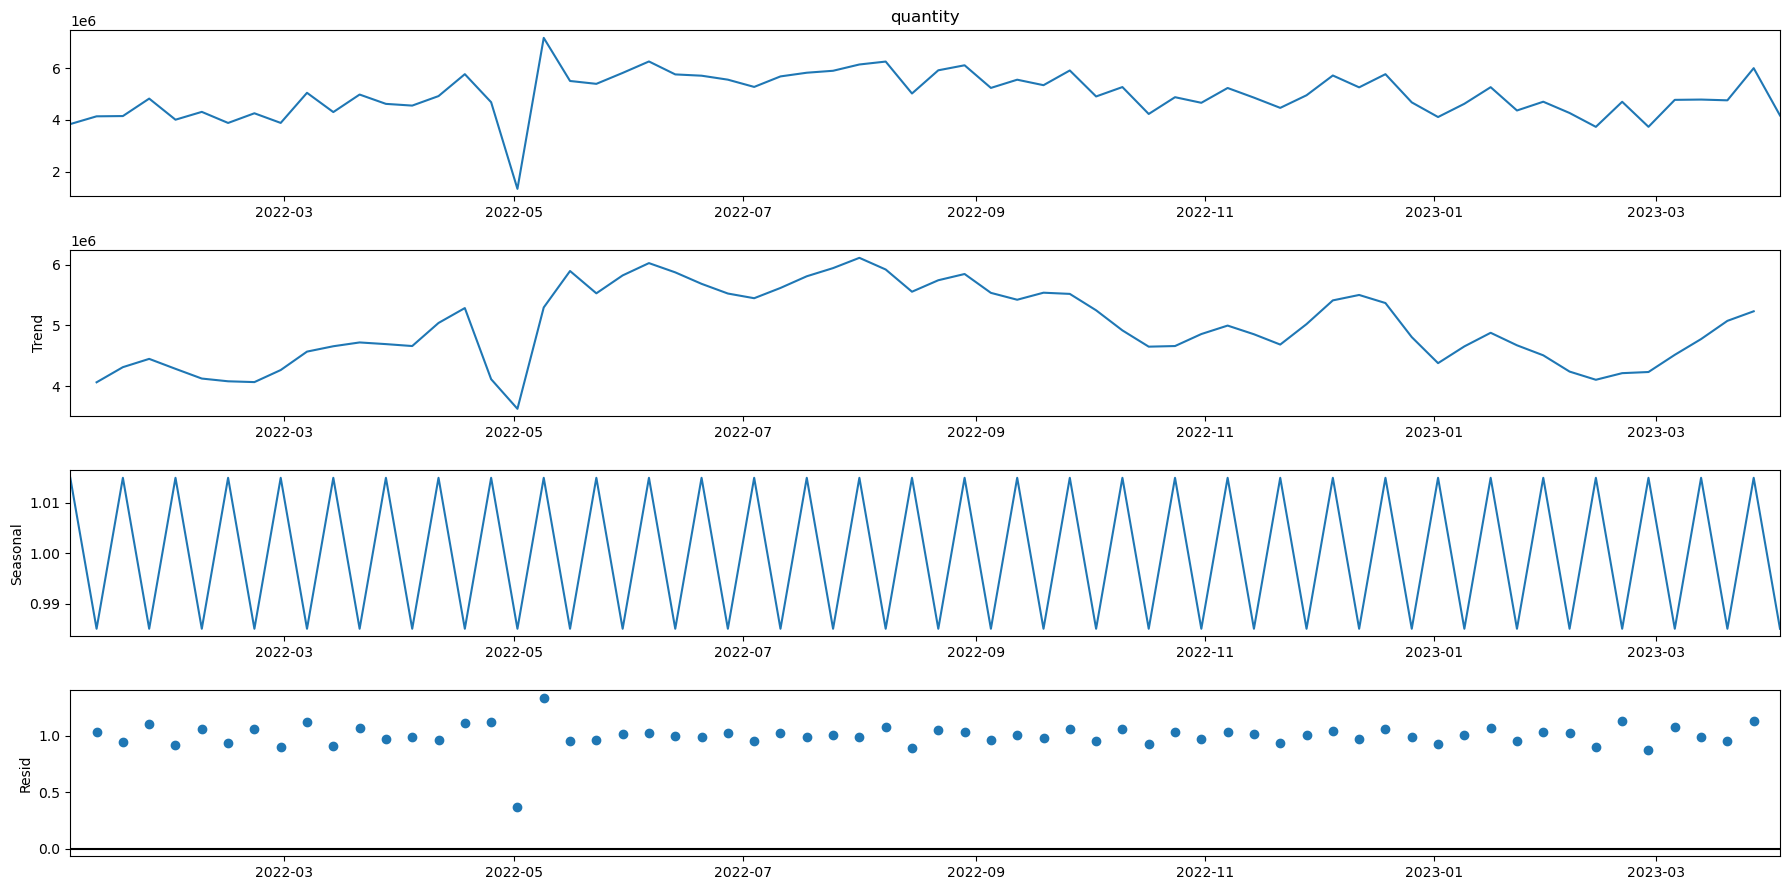

In [18]:
# Cek dataset menggunakan seasonal decomposed multiplicative
decomposed = seasonal_decompose(df3['quantity'], model='multiplicative',period=2)
fig = decomposed.plot()
fig.set_size_inches((18, 9))

fig.tight_layout()
plt.show();

Insight:

- Dari 2 plot data di atas terlihat bahwa selama periode jan 2022 hingga apr 2023 terjadi kenaikan & penurunan tertinggi di bulan apr 2022 - juli 2022

- Dataset memiliki seasonality, terlihat dari plot model additive & multiplicative di atas (di bagian seasonal) memiliki trend berulang di sepanjang tahun

- Saya akan menggunakan model sarimax & holt winters (additive) untuk uji forecasting dikarenakan adanya seasonality & residu yang lebih terkontrol

In [19]:
# Stationary Test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [20]:
# Stationary Test
adf_test(df3)

ADF Statistic: -2.794084
p-value: 0.059124


Insight:

- Dari data di atas terlihat bahwa dataset mempunyai P-value sebesar 0.059 yaitu masih belum berbentuk stasioner sehingga saya harus lakukan handling 

In [21]:
# Handling non stationary dataset
first_diff = df3.diff().fillna(0)
first_diff

,quantity
week_start_date,
2022-01-03,0.0
2022-01-10,299377.0
2022-01-17,10143.0
2022-01-24,675196.0
2022-01-31,-816246.0
...,...
2023-03-06,1042684.0
2023-03-13,11473.0
2023-03-20,-29521.0


In [22]:
# Cek stationary dataset setelah handling
adf_test(first_diff)

ADF Statistic: -8.118565
p-value: 0.000000


Insight:

- Dari hasil handling di atas terlihat bahwa hasil P-value sudah stasioner (score di bawah 0.05) sehingga bisa dilakukan proses modeling lebih lanjut

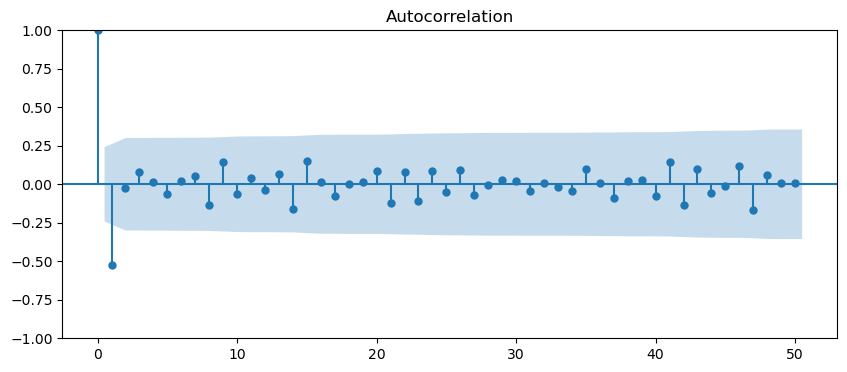

In [23]:
# Mencari parameter Q dalam Autocorrelation
fig, ax = plt.subplots(figsize=(10, 4))
acf_plot = plot_acf(first_diff, lags=50,ax=ax)

Insight:

- dari grafik Autocorrelation di atas bisa terlihat parameter '1' bisa dimasukan menjadi parameter Q dalam model karena tidak ada korelasi terhadap quantity

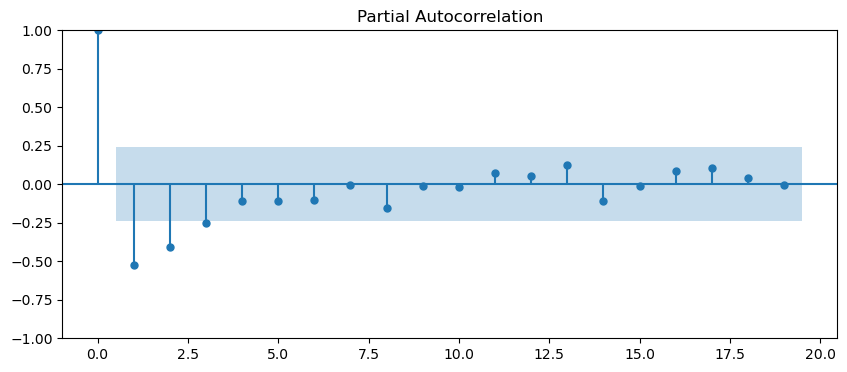

In [24]:
# Mencari parameter P dalam Autocorrelation

fig, ax = plt.subplots(figsize=(10, 4))
pacf_plot = plot_pacf(first_diff,ax=ax,method='ywm')

Insight:

- dari grafik Partial Autocorrelation di atas bisa terlihat parameter '1' / '2' / '3' bisa dimasukan menjadi parameter P dalam model karena tidak ada korelasi terhadap quantity

In [25]:
# Split data menjadi data train (data tahun 2022) & data test (data tahun 2023)
train = df3[:'2022']
test = df3['2023':]

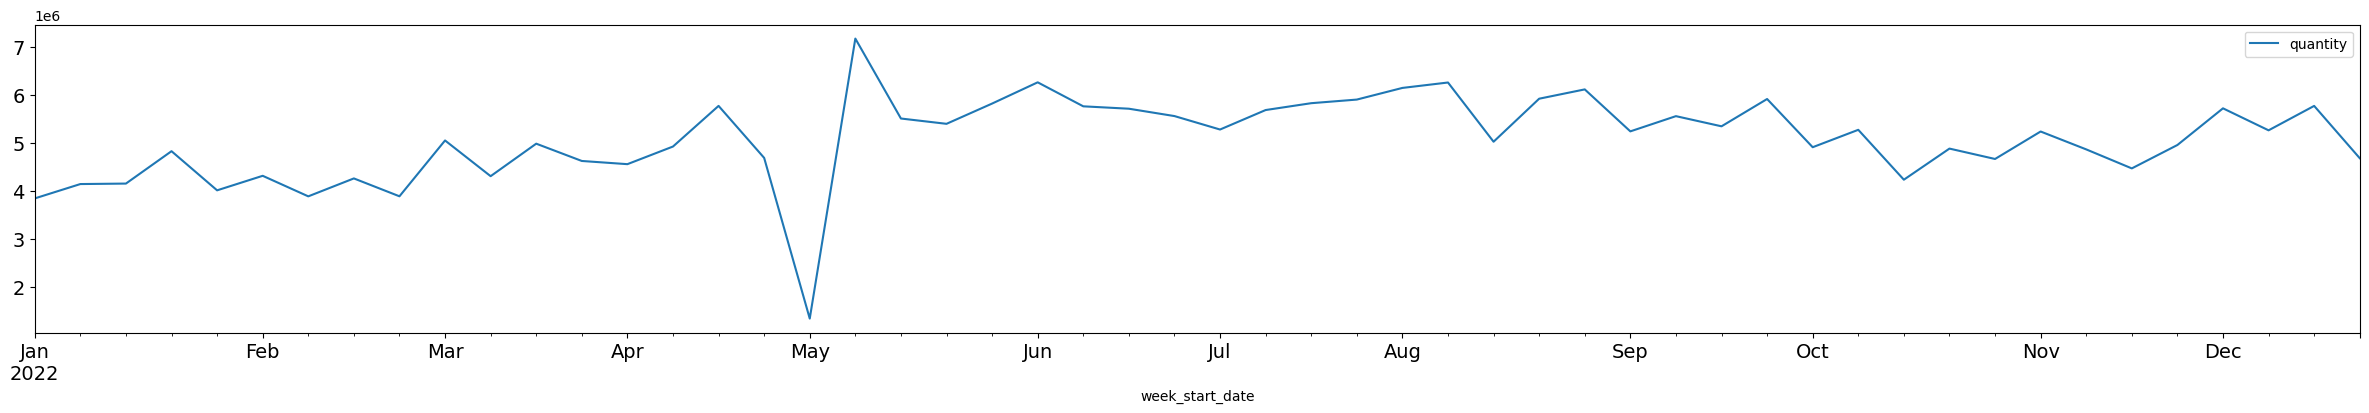

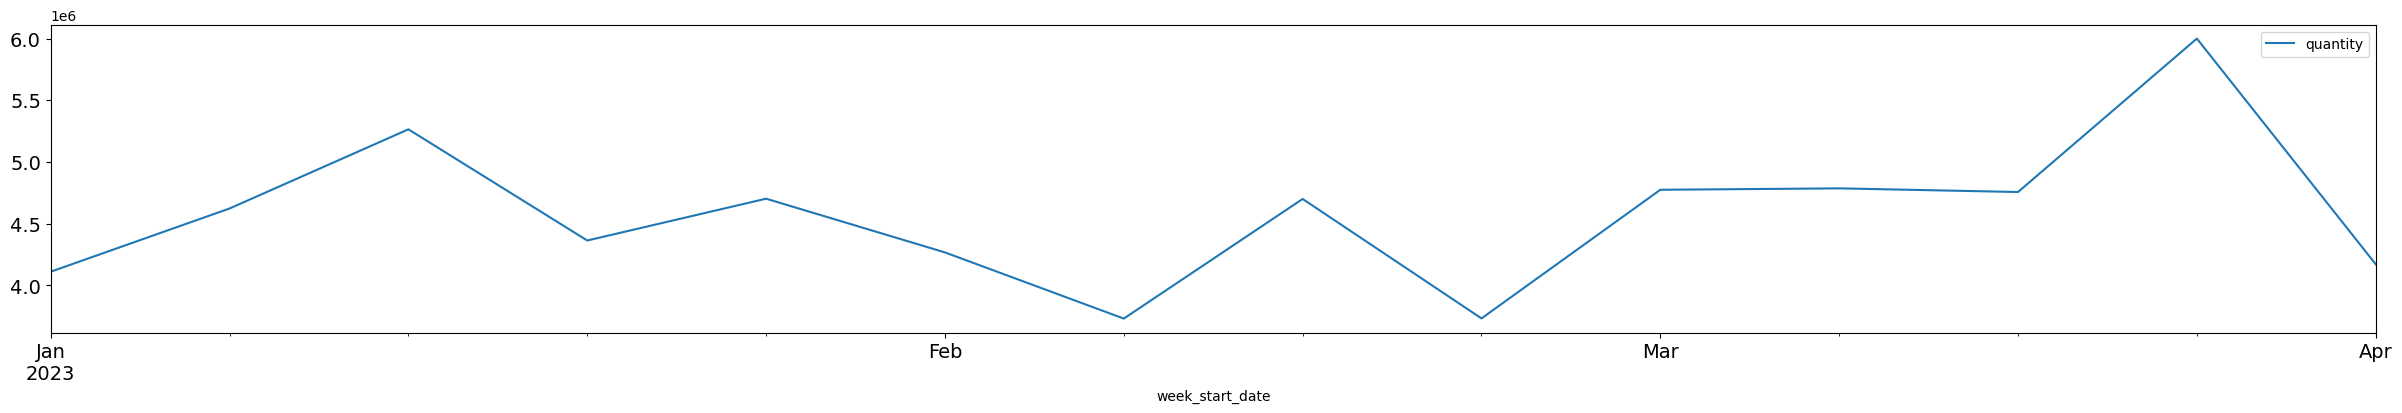

In [27]:
# Plot grafik data train & test
train.plot(figsize=(30,4), fontsize=14)
test.plot(figsize=(30,4), fontsize=14)
plt.show()

# `MODEL ANALYSIS - SARIMAX`

In [28]:
# Uji model sarimax
my_order = (2,1,1)
my_seasonal_order = (2, 1, 1, 10)

model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order).fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23436D+01    |proj g|=  4.70117D-01

At iterate    5    f=  1.20720D+01    |proj g|=  8.83977D-03

At iterate   10    f=  1.20715D+01    |proj g|=  7.66235D-04

At iterate   15    f=  1.20715D+01    |proj g|=  1.76836D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     21      1     0     0   2.675D-05   1.207D+01
  F =   12.071478866144558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [29]:
# Uji model sarimax
start_index = test.index[0]
end_index = test.index[-1]
predictions = model.predict(start=start_index, end=end_index)

Text(0, 0.5, 'Quantity')

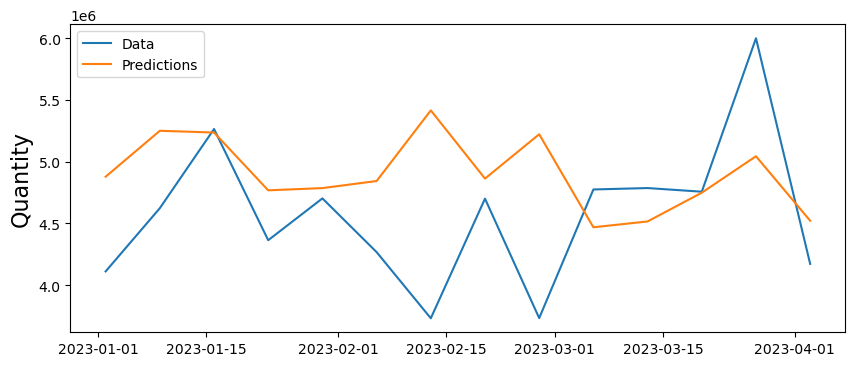

In [30]:
# Uji model sarimax
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Quantity', fontsize=16)

In [31]:
# Uji model sarimax
mean_absolute_error(predictions, test)

551172.1846934939

In [32]:
# Uji model sarimax
mape = mean_absolute_percentage_error(predictions, test)
mape

0.10930791687404506

Insight:

- Dari evaluasi model sarimax di atas terlihat bahwa model mempunyai tingkat error dalam memprediksi data sebesar 11%

# `MODEL ANALYSIS - HOLT WINTERS(Additive)`

In [33]:
# Uji model holt winters (additive)
exp_model = ExponentialSmoothing(train ,seasonal_periods=10 ,trend="add", seasonal='add',use_boxcox=True).fit(optimized=True)
predictions2 = exp_model.forecast(len(test))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0, 0.5, 'Quantity')

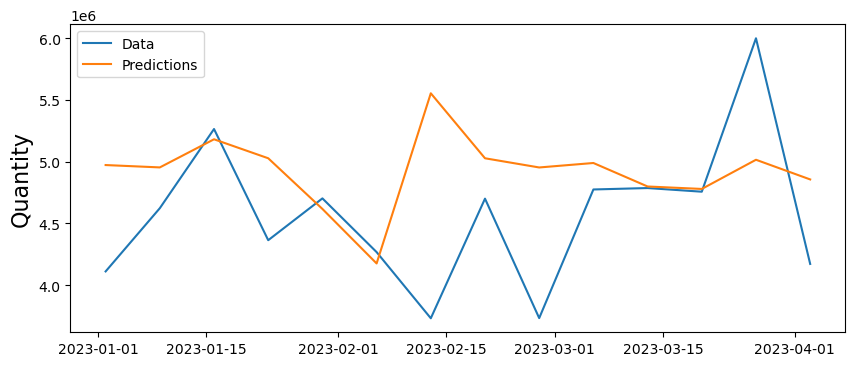

In [34]:
# Uji model holt winters (additive)
plt.figure(figsize=(10,4))

plt.plot(test)
plt.plot(predictions2)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.ylabel('Quantity', fontsize=16)

In [35]:
# Uji model holt winters (additive)
mean_absolute_error(predictions2, test)

529193.4178483614

In [36]:
# Uji model holt winters (additive)
mape2 = mean_absolute_percentage_error(predictions2, test)
mape2

0.10401343462561789

Insight:

- Dari evaluasi model Holt Winters di atas terlihat bahwa model mempunyai tingkat error dalam memprediksi data sebesar 10%
- Saya akan menggunakan model Holt Winters untuk menjadi model prediksi data

# `FORECAST`

In [37]:
# Implementasi model holt winters (additive)
forecast_holt = exp_model.predict(start = len(df3), end = (len(df3)-1) +10)

In [38]:
# Implementasi model holt winters (additive)
forecast_holt

2023-04-10    4.429054e+06
2023-04-17    3.964590e+06
2023-04-24    5.401556e+06
2023-05-01    4.856851e+06
2023-05-08    4.779476e+06
2023-05-15    4.817077e+06
2023-05-22    4.618994e+06
2023-05-29    4.598288e+06
2023-06-05    4.844336e+06
2023-06-12    4.678515e+06
Freq: W-MON, dtype: float64

In [39]:
# Implementasi model holt winters (additive)
forecast_df = pd.DataFrame(forecast_holt)
forecast_df = forecast_df.rename(columns={'predicted_mean': 'Forecast'})
print(forecast_df)

                       0
2023-04-10  4.429054e+06
2023-04-17  3.964590e+06
2023-04-24  5.401556e+06
2023-05-01  4.856851e+06
2023-05-08  4.779476e+06
2023-05-15  4.817077e+06
2023-05-22  4.618994e+06
2023-05-29  4.598288e+06
2023-06-05  4.844336e+06
2023-06-12  4.678515e+06


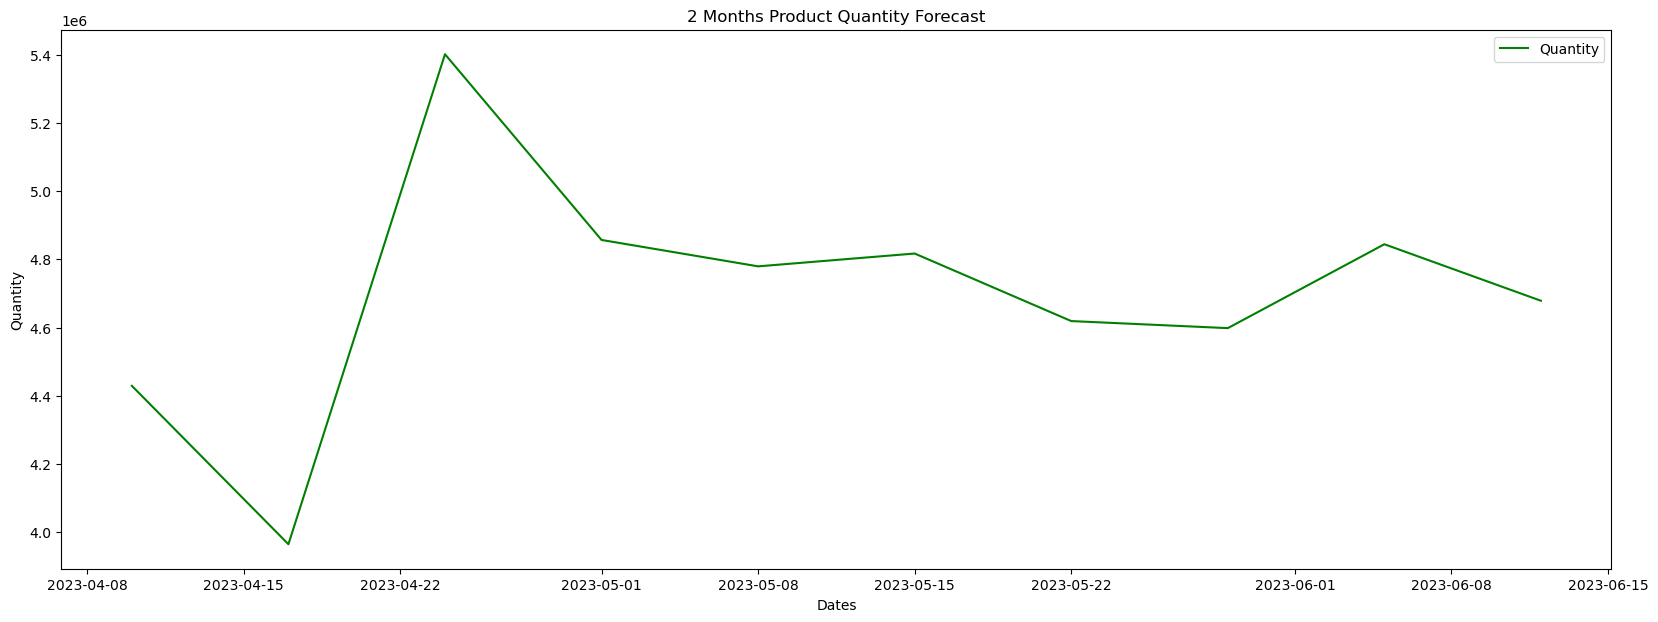

In [40]:
# Implementasi model holt winters (additive)
plt.figure(figsize=(20,7))
plt.plot(forecast_df, color='green', label='Quantity')
plt.title('2 Months Product Quantity Forecast')
plt.xlabel('Dates')
plt.ylabel('Quantity')
plt.legend()

Insight:

- Dari hasil di atas terlihat bahwa trend quantity produk terjual diprediksi akan meningkat di akhir bulan April 2023 (dikarenakan fase ramadhan dan menuju lebaran) lalu akan mengalami saturasi penjualan di bulan Mei 2023

# `OVERAL ANALYSIS`

## EDA

Dataset memiliki 103,733 data entry & 5 kolom

- week_number = Minggu ke berapa untuk produk tertentu yang terjual (2021-52 hingga 2023-14)
- week_start_date = Periode kapan suatu produk mulai terjual
- week_end_date = Periode kapan suatu produk selesai terjual
- product_item = Produk item / produk code (variabel bebas)
- quantity = Jumlah produk yang terjual dalam periode tersebut


*Dari dataset terlihat bahwa ada 2 missing value pada kolom product item dan akan saya lakukan handling missing value untuk handling missing value tersebut

*Saya menggunakan kolom week_start_date & quantity untuk kebutuhan analisis lebih lanjut

*Untuk kebutuhan prosesing model timeseries lebih lanjut maka kita menjadikan kolom week start date menjadi index dalam dataset baru ini

*Pada kolom week start date sudah di-compile quantity dengan penjualan di tanggal yang sama menjadi 1 total quantity saja

## BUSINESS


*Dari dataset terlihat bahwa selama periode jan 2022 hingga apr 2023 terjadi kenaikan & penurunan tertinggi di bulan apr 2022 - juli 2022, hal ini disebabkan oleh adanya:

*Kenaikan transaksi penjualan pada periode Ramadhan 2022
*Kenaikan interest para beauty enthusiast di bulan april pada channel youtube Wardah, terlihat dari banyaknya Ad views yang lebih dari 4 juta penonton di youtube Wardah

source google trends

## MODEL & DATA HANDLING


*Saya menggunakan 2 jenis model untuk melakukan uji prediksi timeseries: Sarimax & Holt Winters (Additive). Alasan digunakan 2 produk ini adalah karena dari hasil prosesing data, terlihat bahwa dataset mempunyai pergerakan grafik quantity yang bersifat seasonal & mempunyai tingkat residu yang lebih baik melalui uji Additive

- Dari evaluasi model sarimax terlihat bahwa model mempunyai tingkat error dalam memprediksi data sebesar 11%
- Dari evaluasi model Holt Winters di atas terlihat bahwa model mempunyai tingkat error dalam memprediksi data sebesar 10%

*Saya menggunakan model Holt Winters untuk menjadi model prediksi data


# `FURTHER IMPROVEMENT PLAN`

Untuk improvement selanjutnya bisa dicoba model lain untuk implementasi forecasting timeseries secara seasonal, salah satunya FB Prophet. 
Trial & error diperlukan untuk mendapatkan model yang terbaik. Namun, dikarenakan keterbatasan waktu persiapan maka untuk saat ini model yang dipakai merupakan model yang umum dipakai saja.